In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import re
import random
from bs4 import BeautifulSoup
import os

In [ ]:
with open('/content/drive/MyDrive/total_temp_v10.jsonl', 'r',encoding="utf8") as json_file:
    json_list = list(json_file)

with open('/content/drive/MyDrive/makarem.xml', 'r', encoding="utf8") as f:
  content = f.read()

soup= BeautifulSoup(content, 'xml')

def findOccurrences(s, ch):
    return [i for i, letter in enumerate(s) if letter == ch]

dict_data_list = []
exception_list = []

for json_str in json_list:

    result = json.loads(json_str)
    context = result['context']
    context = re.sub("[\(\[].*?[\)\]]", "", context)
    context = re.sub(" +", " ", context)
    answer = result['answers']
    answer_freq = context.count(answer)

    new_data = {}
    new_data['question'] = result['question']
    answer_dict = {}

    if 's' in result['pq_id']:
        new_data['pq_id'] = result['pq_id']

        if '*' in context:
            markers = findOccurrences(context, '*')
            answer_dict['text'] = result['answers']
            answer_dict['start_char'] = markers[0]
            new_data['answers'] = [answer_dict]
            new_data['context'] = context.replace('*', '')
        else:
            new_data['context'] = context
            answer_dict['text'] = result['answers']
            answer_dict['start_char'] = context.find(result['answers'])
            new_data['answers'] = [answer_dict]

    elif 's' not in result['pq_id']:
        verses = (result['pq_id'].split(":", 1)[1]).split('_')[0]
        start_verse = int(verses.split('-')[0])
        end_verse = int(verses.split('-')[1])
        chapter = result['pq_id'].split(":", 1)[0]

        if start_verse == end_verse:
            new_data['pq_id'] = 's'+ str(chapter) + '.' + str(start_verse)

            if '*' in context:
                markers = findOccurrences(context, '*')
                answer_dict['text'] = result['answers']
                answer_dict['start_char'] = markers[0]
                new_data['answers'] = [answer_dict]
                new_data['context'] = context.replace('*', '')
            else:
                new_data['context'] = context
                answer_dict['text'] = result['answers']
                answer_dict['start_char'] = context.find(result['answers'])
                new_data['answers'] = [answer_dict]

        else:
            verse_list = []
            for i in range(start_verse, end_verse+1):
                verse_dict = {}
                verse_id = 's'+ str(chapter) + '.' + str(i)
                try:
                  verse_content = soup.find(id=verse_id).contents[0]
                  verse_content = re.sub("[\(\[].*?[\)\]]", "", verse_content)
                  verse_content = re.sub(" +", " ", verse_content)
                except:
                  print('verse_id: ' + str(verse_id) + 'pq_id: ' + str(result['pq_id']))

                verse_dict['id'] = verse_id
                verse_dict['content'] = verse_content
                verse_list.append(verse_dict)

            if '*' in context:
                counter = 0
                id = ''
                new_content = ''

                clean_verse = context.replace('*', '')
                for verse in verse_list:
                    if verse['content'] in context:
                        counter+=1
                    else:
                        id = verse['id']
                        new_content = verse['content']


                if counter == len(verse_list)-1 and id:
                    new_data['pq_id'] = id
                    new_data['context'] = new_content
                    if new_content.count(result['answers']) == 1:
                        start_char = new_content.find(result['answers'])
                        answer_dict['text'] = result['answers']
                        answer_dict['start_char'] = new_content.find(result['answers'])
                        new_data['answers'] = [answer_dict]
                    else:
                        for verse in verse_list:
                            if verse['id'] != id:
                                context = context.replace(verse['content'], '')

                        markers = findOccurrences(context, '*')
                        answer_dict['text'] = result['answers']
                        answer_dict['start_char'] = markers[0]
                        new_data['answers'] = [answer_dict]
                        new_data['context'] = context.replace('*', '')

                else:
                  pass
                    # print(result['pq_id'])
                    # exception_list.append(result)
                # markers = findOccurrences(context, '*')
                # passage = context.replace('*', '')

            else:
                for verse in verse_list:
                    if answer in verse['content']:
                        new_data['pq_id'] = verse['id']
                        new_data['context'] = verse['content']
                        answer_dict['text'] = result['answers']
                        answer_dict['start_char'] = verse['content'].find(result['answers'])
                        new_data['answers'] = [answer_dict]
                        break


    if 'answers' in new_data.keys():
        dict_data_list.append(new_data)
    else:
        exception_list.append(result)


In [ ]:
len(dict_data_list)

7695

In [ ]:
for each in exception_list:
  print(each['question'])
  print(each['answers'])
  print(each['pq_id'])
  print('*****************')

انواع حیوانات در قرآن چیست؟
نهنگ
21:87-88_231
*****************
کافران و منافقان به چیز سوگند می‌خورند؟
در غیاب پیامبر، سخنان نادرست نگفته‌اند
9:73-74_408
*****************
قوم قارون به او توصیه کردند که چه را فراموش نکند؟
بهره‌ات از دنیا
28:76-81_314
*****************
کفاره ظهار چیست؟
باید پیش از آمیزش جنسی با هم، برده‌ای را آزاد کنند؛ این دستوری است که به آن اندرز داده می‌شوید؛ و خداوند به آنچه انجام می‌دهید آگاه است! و کسی که توانایی نداشته باشد، دو ماه پیاپی قبل از آمیزش روزه بگیرد؛ و کسی که این را هم نتواند، شصت مسکین را اطعام کند
58:1-4_146
*****************
کم‌فروشان چه کسانی هستند؟
آنان که وقتی برای خود پیمانه می‌کنند، حق خود را بطور کامل می‌گیرند؛ امّا هنگامی که می‌خواهند برای دیگران پیمانه یا وزن کنند، کم می‌گذارند
83:1-17_141
*****************
فضیلت شب قدر چیست؟
شب قدر بهتر از هزار ماه است! فرشتگان و «روح» در آن شب به اذن پروردگارشان برای هر کاری نازل می‌شوند. شبی است سرشار از سلامت تا طلوع سپیده!
97:1-5_153
*****************
چه کسانی پس از مشاهده معجزه موسی به سجده افتادند؟

In [ ]:
with open('/content/drive/MyDrive/Dataset_v10.json', 'r', encoding = 'utf_8_sig') as fp:
  dict_data_list = json.load(fp)

In [ ]:
from statistics import mean
import pandas as pd
import seaborn as sns

all_data = pd.DataFrame(dict_data_list)

questions_lengths = [len(q.split(' ')) for q in all_data['question'].tolist()]

min_q = min(questions_lengths)

mean_q = mean(questions_lengths)

print(mean_q)

axs =sns.histplot([len(q.split(' ')) for q in all_data['question'].tolist()])
axs.set(xlabel = 'question length', ylabel='count')
axs.plot()

11.140090968161143


[]

7695
2.484305519225739
20
7646


[]

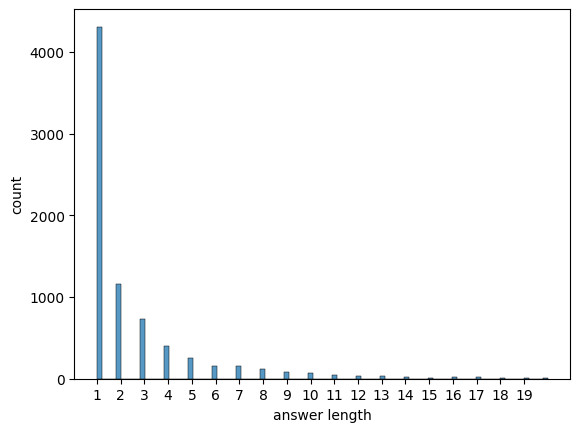

In [ ]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns

all_data = pd.DataFrame(dict_data_list)

answers_list = []
for qa in dict_data_list:
  answers_list.append(qa['answers'][0]['text'])

# for ans in answers_list:
#   # if len(ans.split(' '))==168 or len(ans.split(' '))==53 or len(ans.split(' '))==43 or len(ans.split(' '))==46 or len(ans.split(' '))==42 or len(ans.split(' '))==38 or len(ans.split(' '))==36:
#   if len(ans.split(' ')) >= 10:
#     answers_list.remove(ans)
#     answers_list.discard(ans)
#     print(ans)

answers_list2 = [x for x in answers_list if len(x.split(' ')) <= 20]

print(len(answers_list))
answers_lengths = [len(q.split(' ')) for q in answers_list2]
min_q = min(answers_lengths)

mean_q = mean(answers_lengths)

print(mean_q)
print(max(answers_lengths))
print(len(answers_list2))



# sns.reset_orig()
# sns.reset_defaults()
x = np.array(answers_lengths)
tick_labels = np.array([5, 15, 20])

axs =sns.histplot([len(q.split(' ')) for q in answers_list2])
axs.set(xlabel = 'answer length', ylabel='count')
axs.set_xticks(range(20)) # <--- set the ticks first
# axs.set_xticklabels(answers_list2.astype(int))
# axs.set_xticklabels(x.astype(int))
# axs.set_xticklabels(tick_labels.astype(int))
# axs.ticklabel_format(style='plain')

axs.plot()

# character based

52.81754385964912


[]

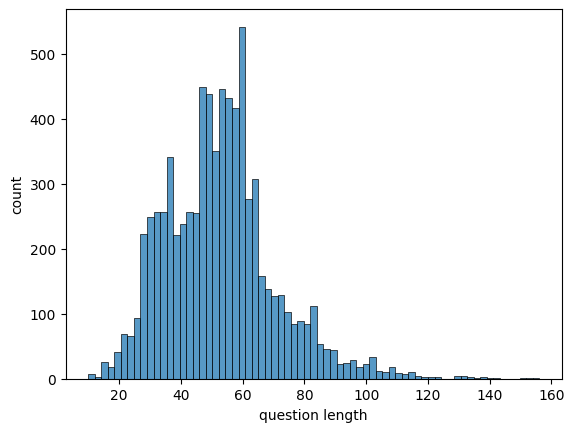

In [ ]:
from statistics import mean
import pandas as pd
import seaborn as sns

all_data = pd.DataFrame(dict_data_list)

questions_lengths = [len(q) for q in all_data['question'].tolist()]

min_q = min(questions_lengths)

mean_q = mean(questions_lengths)

print(mean_q)

axs =sns.histplot([len(q) for q in all_data['question'].tolist()])
axs.set(xlabel = 'question length', ylabel='count')
axs.plot()

7695
11.992806696311797
124
7646


[]

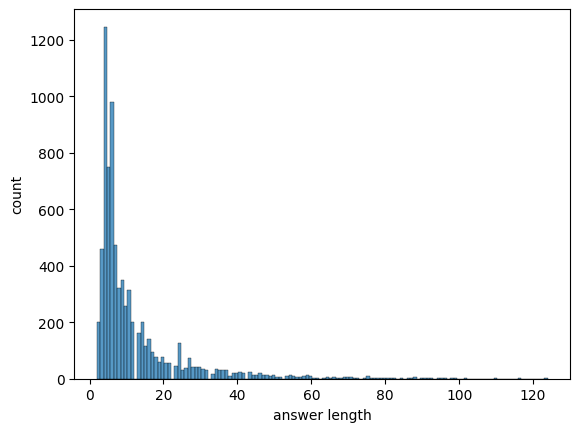

In [ ]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns

all_data = pd.DataFrame(dict_data_list)

answers_list = []
for qa in dict_data_list:
  answers_list.append(qa['answers'][0]['text'])


answers_list2 = [x for x in answers_list if len(x.split(' ')) <= 20]

print(len(answers_list))
# answers_lengths = [len(q.split(' ')) for q in answers_list2]
answers_lengths = [len(q) for q in answers_list2]
min_q = min(answers_lengths)

mean_q = mean(answers_lengths)

print(mean_q)
print(max(answers_lengths))
print(len(answers_list2))


x = np.array(answers_lengths)
tick_labels = np.array([5, 15, 20])

# axs =sns.histplot([len(q.split(' ')) for q in answers_list2])
axs =sns.histplot([len(q) for q in answers_list2])
axs.set(xlabel = 'answer length', ylabel='count')
# axs.set_xticks(range(20)) # <--- set the ticks first

axs.plot()

In [ ]:
number_marks = ['مقدار' ,'تعداد' ,'چند' ,'چه مدت']

number_questions = []

for each in dict_data_list:
  constraint = any(ele in each['question'] for ele in number_marks)
  if constraint:
    number_questions.append(each)


event_marks = ['واقعه' ,'چه روز' ,'کدام روز' ,'چه زمانی' ,'وقت' ,'وقت' ,'موقع' ,'زمان' ,'چه هنگامی']

event_questions = []
for each in dict_data_list:
  constraint = any(ele in each['question'] for ele in event_marks)
  if constraint:
    event_questions.append(each)


people_marks = ['نام فرزند' ,'نام پدر' ,'مادر' ,'چه گروهی' ,'کدام گروه' ,'کدام افراد' ,'چه افرادی' ,'چه کسانی' ,'چه کسی','کدام پیامبر']
people_questions = []

for each in dict_data_list:
  constraint = any(ele in each['question'] for ele in people_marks)
  if constraint:
    people_questions.append(each)


location_marks = ['مکان' ,'محل' ,'جایگاه' ,'چه جایی' ,'چه مکانی','کجا']

location_questions = []

for each in dict_data_list:
  constraint = any(ele in each['question'] for ele in location_marks)
  if constraint:
    location_questions.append(each)


adjective_marks = ['صفت' ,'صفات']

adjective_questions = []

for each in dict_data_list:
  constraint = any(ele in each['question'] for ele in adjective_marks)
  if constraint:
    adjective_questions.append(each)


phrase_questions = []

for each in dict_data_list:
  # print(each['answers'])
  # break
  if len(each['answers'][0]['text'])> 15:
    # print(each['answers'][0]['text'])
    phrase_questions.append(each)

In [ ]:
print('people_questions: ' + str(len(people_questions)))
print('location_questions: ' + str(len(location_questions)))
print('phrase_questions: ' + str(len(phrase_questions)))
print('event_questions: ' + str(len(event_questions)))
print('number_questions: ' + str(len(number_questions)))
print('adjective_questions: ' + str(len(adjective_questions)))

people_questions: 2647
location_questions: 274
phrase_questions: 1664
event_questions: 315
number_questions: 305
adjective_questions: 196


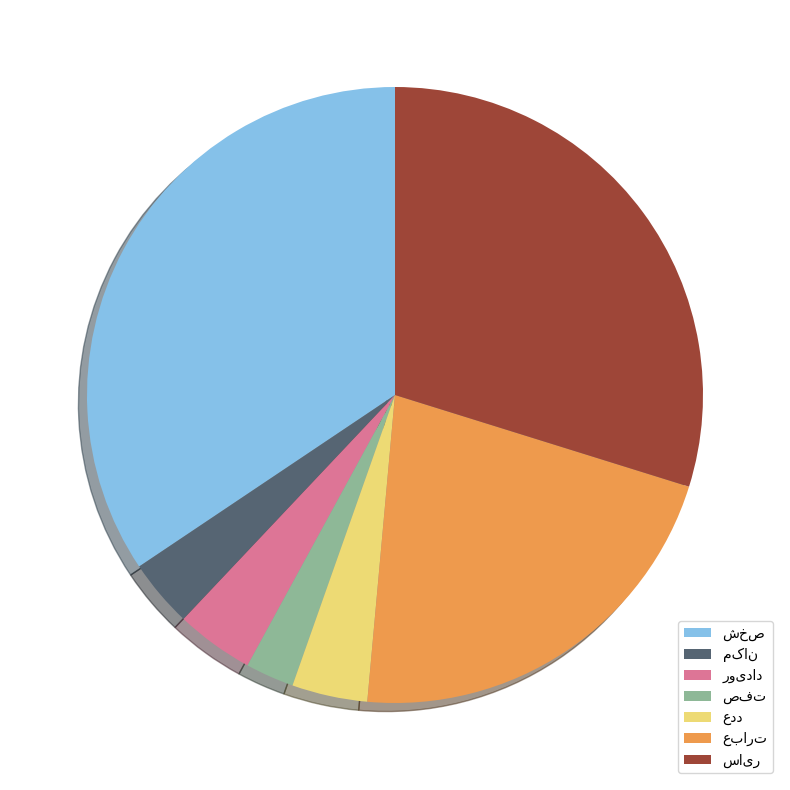

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.pie(data)


# y = np.array([35.1, 1.2, 3.7, 5, 4.9, 34.5, 15.6])

p_list = [len(people_questions)/len(dict_data_list)*100,
          len(location_questions)/len(dict_data_list)*100,
          len(event_questions)/len(dict_data_list)*100,
          len(adjective_questions)/len(dict_data_list)*100,
          len(number_questions)/len(dict_data_list)*100,
          len(phrase_questions)/len(dict_data_list)*100,
          29.81]

y = np.array(p_list)

mylabels = ["شخص", "مکان", "رویداد", "صفت", "عدد", "عبارت", "سایر"]

colors = ['#85C1E9', '#566573', '#DD7596', '#8EB897', '#EDDA74', '#EE9A4D', '#9E4638']

# plt.pie(y, labels = mylabels, colors = colors)
patches, texts = ax.pie(y, colors=colors, shadow=True, startangle=90)
ax.legend(patches, mylabels, loc='lower right')

plt.show()

In [ ]:
p_list

[34.398960363872646,
 3.5607537361923325,
 4.093567251461988,
 2.5471085120207926,
 3.9636127355425597,
 21.624431448992855,
 29.81]

In [ ]:
y

array([ 34.39896036,   3.56075374, 160.71428571,   2.54710851,
         3.96361274,  21.62443145,  29.81      ])

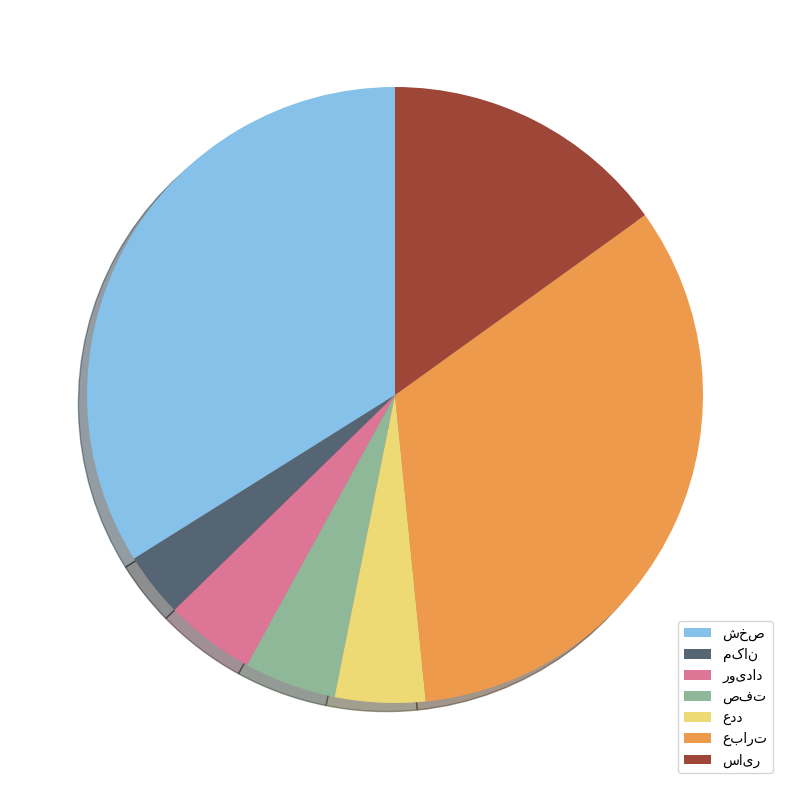

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.pie(data)


y = np.array([35.1, 3.5, 4.9, 5, 4.9, 34.5, 15.6])


mylabels = ["شخص", "مکان", "رویداد", "صفت", "عدد", "عبارت", "سایر"]

colors = ['#85C1E9', '#566573', '#DD7596', '#8EB897', '#EDDA74', '#EE9A4D', '#9E4638']

# plt.pie(y, labels = mylabels, colors = colors)
patches, texts = ax.pie(y, colors=colors, shadow=True, startangle=90)
ax.legend(patches, mylabels, loc='lower right')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('t5.svg')

In [ ]:
what_questions = []
for each in dict_data_list:
  if 'چه' in each['question']:
    what_questions.append(each)

whats_questions = []
for qa in dict_data_list:
  if 'چیست' in qa['question']:
    whats_questions.append(qa)

which_questions = []
for qa in dict_data_list:
  if 'کدام' in qa['question']:
    which_questions.append(qa)

which_questions = []
for qa in dict_data_list:
  if 'کدام' in qa['question']:
    which_questions.append(qa)

how_many_questions = []
for qa in dict_data_list:
  if 'چند' in qa['question']:
    how_many_questions.append(qa)

who_questions = []
for qa in dict_data_list:
  if 'کیست' in qa['question']:
    who_questions.append(qa)

where_questions = []
for qa in dict_data_list:
  if 'کجا' in qa['question']:
    where_questions.append(qa)

how_much_questions = []
for qa in dict_data_list:
  if 'چه قدر' in qa['question'] or 'چقدر' in qa['question']:
    how_much_questions.append(qa)

name_questions = []
for qa in dict_data_list:
  if 'نام ببرید' in qa['question']:
    name_questions.append(qa)


mention_questions = []
for qa in dict_data_list:
  if 'ذکر کنید' in qa['question']:
    mention_questions.append(qa)


say_questions = []
for qa in dict_data_list:
  if 'بگوئید' in qa['question'] or  'بگویید' in qa['question']:
    say_questions.append(qa)


k_questions = []
for qa in dict_data_list:
  if 'که بود' in qa['question']:
    k_questions.append(qa)

In [ ]:
print('what questions: ' + str(len(what_questions)))
print('what is questions: ' + str(len(whats_questions)))
print('which questions: ' + str(len(which_questions)))
print('how many questions: ' + str(len(how_many_questions)))
print('who questions: ' + str(len(who_questions)))
print('where questions: ' + str(len(where_questions)))
print('how much questions: ' + str(len(how_much_questions)))
print('name questions: ' + str(len(name_questions)))
print('mention questions: ' + str(len(mention_questions)))
print('say questions: ' + str(len(say_questions)))
print('k questions: ' + str(len(k_questions)))

what questions: 4811
what is questions: 351
which questions: 1783
how many questions: 267
who questions: 85
where questions: 189
how much questions: 13
name questions: 158
mention questions: 12
say questions: 36
k questions: 3


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=[4811, 351, 1783, 267, 85, 189, 13, 158, 12, 36, 3],
  theta=['what questions','what is questions','which questions', 'how many questions',
         'who questions', 'where questions','how much questions', 'name questions',
         'mention questions', 'say questions', 'k questions'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

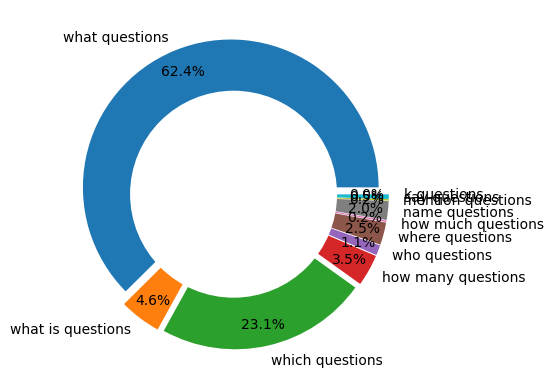

In [ ]:
import matplotlib.pyplot as plt

# Setting labels for items in Chart
# Employee = ['Roshni', 'Shyam', 'Priyanshi',
# 			'Harshit', 'Anmol']

Employee = ['what questions','what is questions','which questions', 'how many questions',
         'who questions', 'where questions','how much questions', 'name questions',
          'mention questions', 'say questions', 'k questions']

# Setting size in Chart based on
# given values
# Salary = [40000, 50000, 70000, 54000, 44000]
Salary = [4811, 351, 1783, 267, 85, 189, 13, 158, 12, 36, 3]

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00',
		'#ADFF2F', '#FFA500']
# explosion
explode_list = []
for i in range(11):
  explode_list.append(0.05)

explode = tuple(explode_list)
# explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(Salary, labels=Employee,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
# plt.title('Employee Salary Details')

# Displaying Chart
plt.show()


([<matplotlib.axis.XTick at 0x7cd52c1da5f0>,
 [Text(0.0, 0, 'what questions'),
  Text(1.0, 0, 'what is questions'),
  Text(2.0, 0, 'which questions'),
  Text(3.0, 0, 'how many questions'),
  Text(4.0, 0, 'who questions'),
  Text(5.0, 0, 'where questions'),
  Text(6.0, 0, 'how much questions'),
  Text(7.0, 0, 'name questions'),
  Text(8.0, 0, 'mention questions'),
  Text(9.0, 0, 'say questions'),
  Text(10.0, 0, 'k questions')])

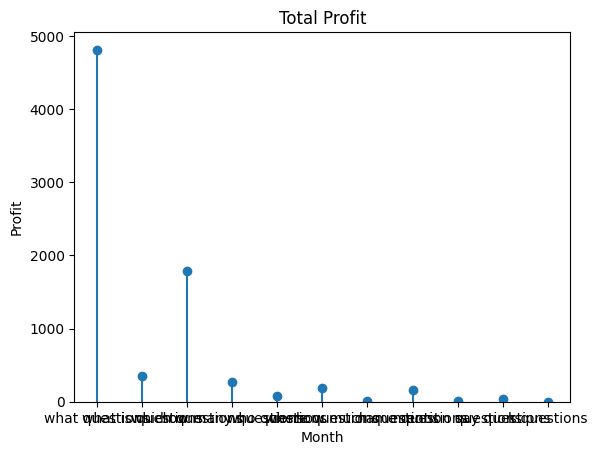

In [ ]:

# import modules
from pandas import *
from matplotlib import pyplot as plt

# read csv file
# d = read_csv("company_sales_data.csv")

# using subplots() to draw vertical lines
fig, axes = plt.subplots()
# axes.vlines(d['month_number'], ymin=0, ymax=d['total_profit'])
axes.vlines(Employee, ymin=0, ymax=Salary)

# drawing the markers (circle)
# axes.plot(d['month_number'], d['total_profit'], "o")
axes.plot(Employee, Salary, "o")
axes.set_ylim(0)

# formatting and details
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Total Profit')
# plt.xticks(d['month_number'])
plt.xticks(Employee)

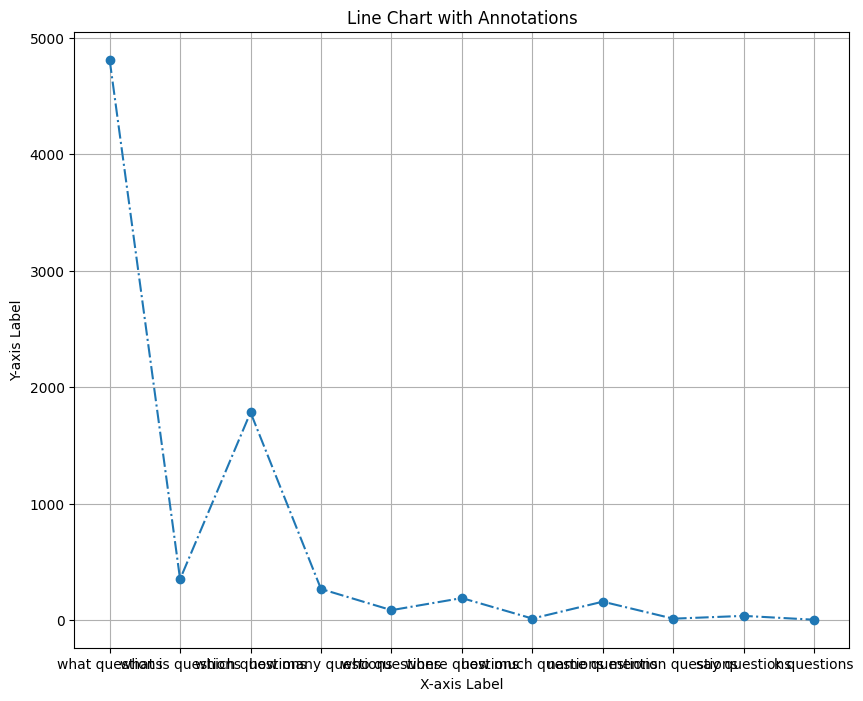

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = Employee
y = Salary

# Create a line chart
plt.figure(figsize=(10, 8))
plt.plot(x, y, marker='o', linestyle='-.')

# Add annotations
# for i, (xi, yi) in enumerate(zip(x, y)):
# 	plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

# Add title and labels
plt.title('Line Chart with Annotations')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Display grid
plt.grid(True)

# Show the plot
plt.show()


# saving data

In [ ]:
import json
import random
import math

with open('/content/drive/MyDrive/Dataset_v10.json', 'w', encoding = 'utf_8_sig') as fp:
  json.dump(dict_data_list, fp, ensure_ascii = False)

In [ ]:
new_dict_data_list = []
for data in dict_data_list:
  new_data = {}
  new_data['title'] = ''
  # try:
  new_data['paragraphs'] = [{'context': data['context'], 'qas':[{'answers':[{'answer_start':data['answers'][0]['start_char'], 'text':data['answers'][0]['text']}],'id':data['pq_id'], 'question': data['question'], 'is_impossible': False}]}]
  # except:
    # print(data)
  new_dict_data_list.append(new_data)

final_data = {}

final_data['data'] = new_dict_data_list


with open('/content/drive/MyDrive/dataset_SQuAD_format_v10.json', 'w') as fp:
  json.dump(final_data, fp, ensure_ascii = False)


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/HAQA-and-QUQA-main/QUQA.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
factoid_QA = df[df["Quetion_Type"] == 'F']

factoid_dict_data = factoid_QA.T.to_dict().values()

In [ ]:
short = []
for qa in factoid_dict_data:
  try:
    if len(qa['Expert_Commentary'].split(' '))<=5:
      short.append(qa)
  except:
    pass

In [ ]:
len(short)

86

In [ ]:
for each in short:
  print(each['Question_Text'])
  print(each['Expert_Commentary'])
  print(each['Quran_Full_Verse_Answer'])
  print(each['Record_Id'])
  print('###################3')

 بأي لغة نزل القرأن الكريم ؟
باللغة العربية الفصحى 
إنه لتنزيل رب العالمين{192} نزل به الروح الأمين{193} على قلبك لتكون من المنذرين{194} بلسان عربي مبين{195} وإنه لفي زبر الأولين {196} الشعراء.
1176
###################3
 ما الآية التي نزلت لما قال المشركون ما نعبد الأصنام إلا حبا لله ليقربونا إليه ؟
 
قل إن كنتم تحبون الله فاتبعوني يحببكم الله ويغفر لكم ذنوبكم والله غفور رحيم{31}آل عمران.
1186
###################3
 ما هي معجزة صالح عليه السلام ؟
الناقة
ويا قوم هـذه ناقة الله لكم آية فذروها تأكل في أرض الله ولا تمسوها بسوء فيأخذكم عذاب قريب{64}هود.
1200
###################3
 من النبي الذي نادته الملائكة وهو قائم يصلي في المحراب ؟
هو زكريا عليه السلام . 
هنالك دعا زكريا ربه قال رب هب لي من لدنك ذرية طيبة إنك سميع الدعاء{38} فنادته الملآئكة وهو قائم يصلي في المحراب أن الله يبشرك بيحيـى مصدقا بكلمة من الله وسيدا وحصورا ونبيا من الصالحين{39}آل عمران .
1210
###################3
 من أول من آمن بعيسى عليه السلام ؟
هم الحواريون
 فلما أحس عيسى منهم الكفر قال من أنصاري إلى الله قال الحواريون نحن 

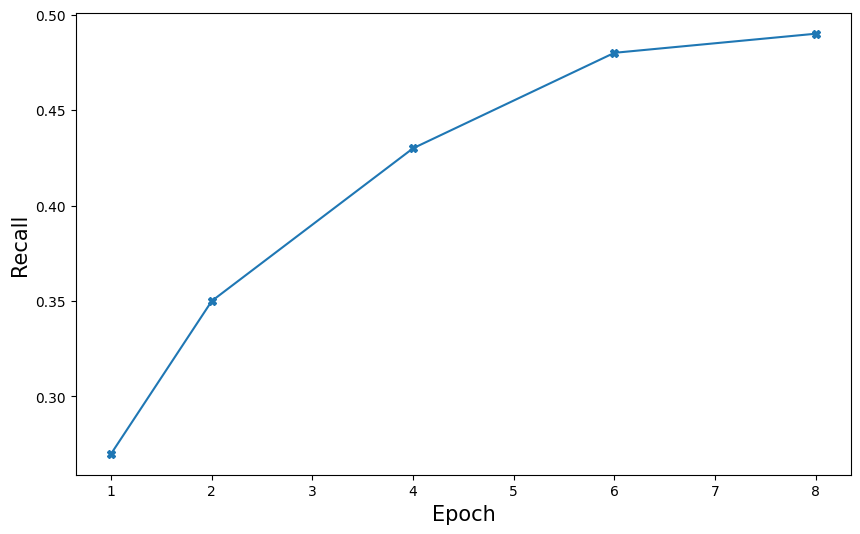

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# x_axis = ['1', '2', '4', '6', '8']

x_axis = [1, 2, 4, 6, 8]

recall = [0.27, 0.35, 0.43, 0.48, 0.49]

plt.figure(figsize=(10, 6))

plt.plot(x_axis, recall, marker='X')


# plt.title('title name')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Recall', fontsize=15)
# plt.legend()
plt.show()

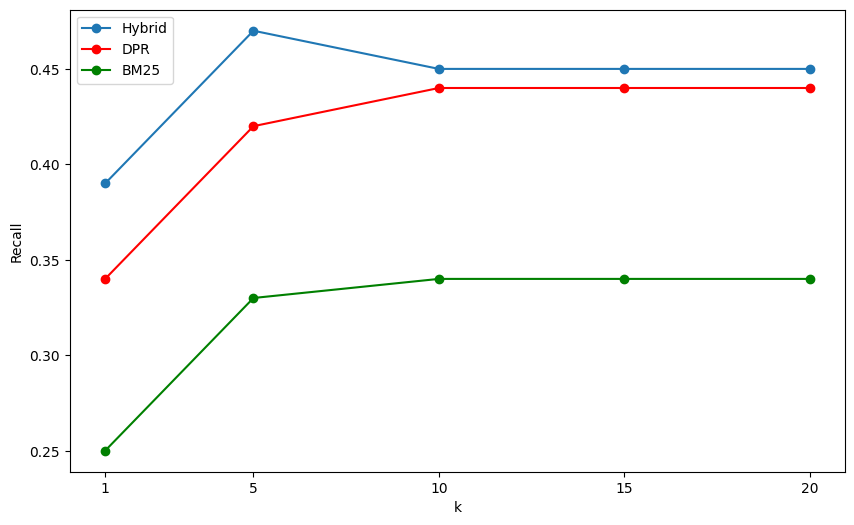

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator


x_axis = [1.0, 5.0, 10.0, 15.0, 20.0]

hybrid = [0.39, 0.47, 0.45, 0.45, 0.45]
DPR = [0.34, 0.42, 0.44, 0.44, 0.44]
BM25 = [0.25, 0.33, 0.34, 0.34, 0.34]

plt.figure(figsize=(10, 6))

plt.plot(x_axis, hybrid, marker='o', label = 'Hybrid')
plt.plot(x_axis, DPR, marker='o', label = 'DPR', color = 'red')
plt.plot(x_axis, BM25, marker='o', label = 'BM25', color = 'green')

# plt.plot(x_axis, khorramdel, marker='o', label = 'khorramdel', color = 'springgreen')
# x_axis.xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.title('title name')
plt.xticks(x_axis)
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend()
plt.show()

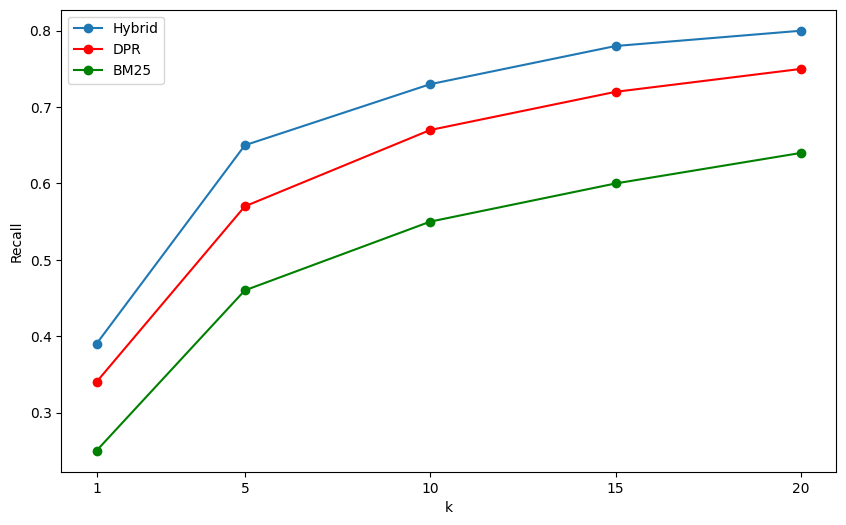

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator


x_axis = [1.0, 5.0, 10.0, 15.0, 20.0]

hybrid = [0.39, 0.65, 0.73, 0.78, 0.80]
DPR = [0.34, 0.57, 0.67, 0.72, 0.75]
BM25 = [0.25, 0.46, 0.55, 0.60, 0.64]

plt.figure(figsize=(10, 6))

plt.plot(x_axis, hybrid, marker='o', label = 'Hybrid')
plt.plot(x_axis, DPR, marker='s', label = 'DPR', color = 'red')
plt.plot(x_axis, BM25, marker='x', label = 'BM25', color = 'green')

# plt.plot(x_axis, khorramdel, marker='o', label = 'khorramdel', color = 'springgreen')
# x_axis.xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.title('title name')
plt.xticks(x_axis)
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend()
plt.show()

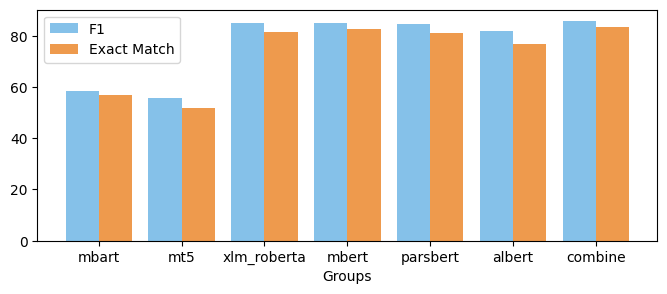

In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

# f1_mbart = []
# f1_mt5 = [86.75, 87.07, 86.87, 87.77]
# f1_parsbert= [82.64, 83.84, 84.46, 84.31]
# f1_roberta = [81.79, 83.24, 83.41, 82.92]
# f1_albert = []
# f1_mbert = []

# em_mbart = [71.42, 74.74, 74.74, 72.44]
# em_mt5 = [83.16, 83.67, 83.67, 83.92]
# em_parsbert = [75.51, 77.57, 77.82, 78.06]
# em_roberta = []
# em_albert = []
# em_mbert = []

em = [57.01, 51.63,81.52, 82.46, 81.12, 76.53, 83.48]
f1 = [58.25, 55.77, 84.77, 85.04, 84.34, 81.95, 85.86]

X = ['mbart', 'mt5','xlm_roberta','mbert','parsbert','albert', 'combine']
# F1 = [mean(f1_original)/100, mean(f1_backtranslation)/100, mean(f1_extra)/100, mean(f1_QG)/100]
# exact_match = [mean(em_original)/100, mean(em_backtranslation)/100, mean(em_extra)/100, mean(em_QG)/100]

X_axis = np.arange(len(X))

# plt.figure(figsize=(8.4, 6.99))
plt.figure(figsize=(8, 3))
# plt.bar(X_axis - 0.2, f1, 0.4, label = 'F1', color = '#85C1E9')
# plt.bar(X_axis + 0.2, em, 0.4, label = 'Exact Match', color = '#EE9A4D')
plt.bar(X_axis - 0.2, f1, 0.4, label = 'F1', color = '#85C1E9')
plt.bar(X_axis + 0.2, em, 0.4, label = 'Exact Match', color = '#EE9A4D')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
plt.legend()
plt.show()


In [ ]:
base_recall = [0.33, 0.56, 0.56, 0.56, 0.56]
new_recall = [0.39, 0.65, 0.73, 0.78, 0.80]

base_map = [0.32, 0.33, 0.33, 0.33, 0.33]
new_map = [0.39, 0.46, 0.42, 0.39, 0.38]

base_mrr = [0.33, 0.34, 0.34, 0.34, 0.34]
new_mrr = [0.39, 0.47 ,0.45, 0.44, 0.43]

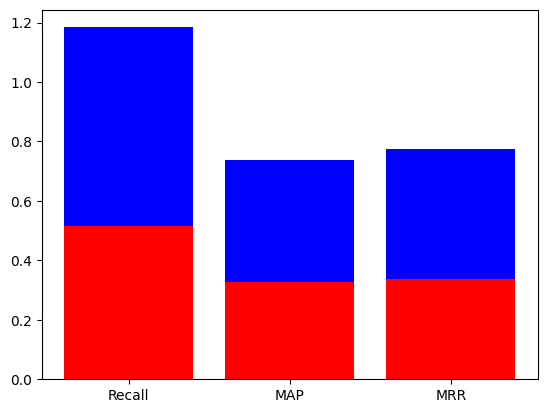

In [ ]:
# importing package
import matplotlib.pyplot as plt
from statistics import mean

# create data
x = ['Recall', 'MAP', 'MRR']
# y1 = [10, 20, 10]
# y2 = [20, 25, 15]
y1 = [mean(base_recall), mean(base_map), mean(base_mrr)]
y2 = [mean(new_recall), mean(new_map), mean(new_mrr)]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()


In [ ]:
y1

[0.514, 0.328, 0.338]

In [ ]:
y2

[0.67, 0.40800000000000003, 0.436]

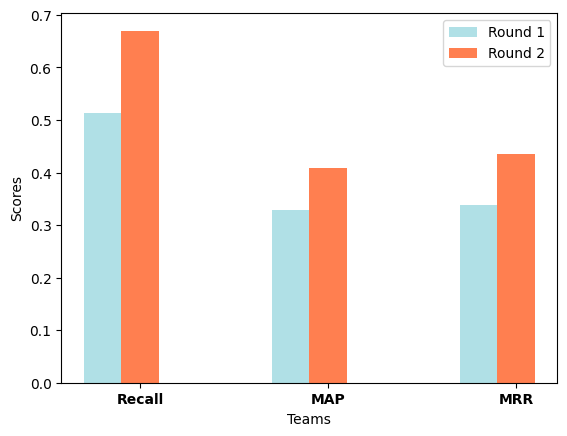

<Figure size 640x480 with 0 Axes>

In [ ]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

# create data
x = np.arange(3)
# y1 = [34, 56, 12, 89, 67]
# y2 = [12, 56, 78, 45, 90]
# y3 = [14, 23, 45, 25, 89]
y1 = [mean(base_recall), mean(base_map), mean(base_mrr)]
y2 = [mean(new_recall), mean(new_map), mean(new_mrr)]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='powderblue')
plt.bar(x, y2, width, color='coral')
# plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Recall', 'MAP', 'MRR'],fontweight='bold')
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('t6.svg')

NameError: name 'y1' is not defined

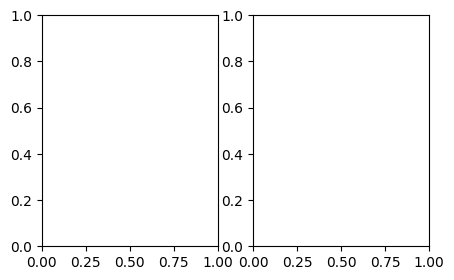

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
plt.bar(x-0.2, y1, width, color='powderblue')
plt.bar(x, y2, width, color='coral')
# plt.bar(x+0.2, y3, width, color='green')
# axes[0].plt.xticks(x, ['Recall', 'MAP'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])


# axes[0].plot(x, y1)
# axes[1].plot(x, y2)
fig.tight_layout()


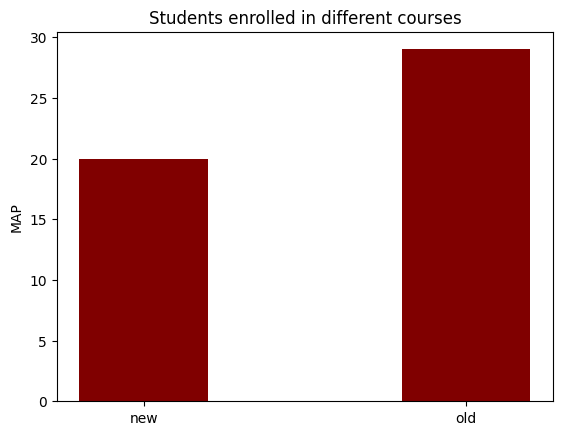

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'new':20, 'old':29}
courses = list(data.keys())
values = list(data.values())

# fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon')

# plt.xlabel("Courses offered")
plt.ylabel("MAP")
plt.title("Students enrolled in different courses")
plt.show()

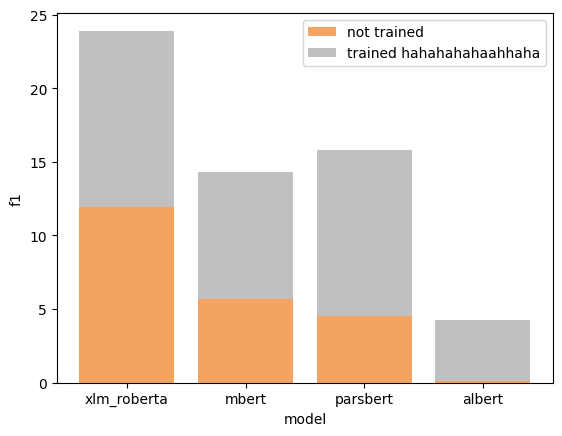

In [ ]:
# importing package
import matplotlib.pyplot as plt
from statistics import mean

# create data
x = ['xlm_roberta', 'mbert', 'parsbert', 'albert']

y1 = [11.96, 5.68, 4.51, 0.09]
y2 = [11.96, 8.60, 11.28, 4.16]


# plot bars in stack manner
plt.bar(x, y1, color='sandybrown')
plt.bar(x, y2, bottom=y1, color='silver')
plt.xlabel("model")
plt.ylabel("f1")
plt.legend(["not trained", "trained hahahahahaahhaha"])
plt.show()


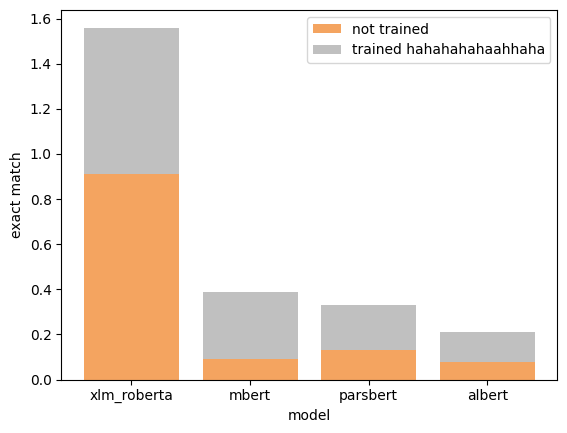

In [ ]:
# importing package
import matplotlib.pyplot as plt
from statistics import mean

# create data
x = ['xlm_roberta', 'mbert', 'parsbert', 'albert']

y1 = [0.91, 0.09, 0.13, 0.08]
y2 = [0.65, 0.30, 0.2, 0.13]


# plot bars in stack manner
plt.bar(x, y1, color='sandybrown')
plt.bar(x, y2, bottom=y1, color='silver')
plt.xlabel("model")
plt.ylabel("exact match")
plt.legend(["not trained", "trained hahahahahaahhaha"])
plt.show()


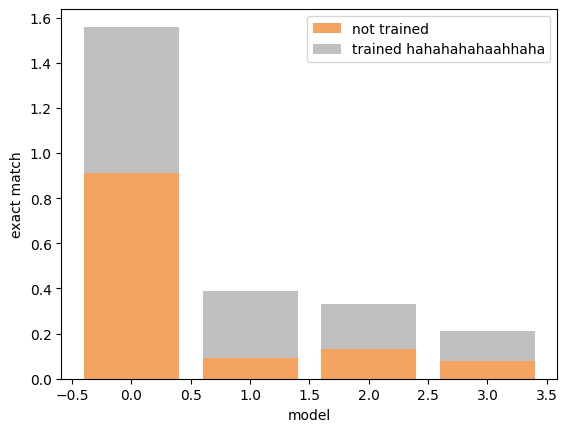

In [ ]:
# importing package
import matplotlib.pyplot as plt
from statistics import mean

x = np.arange(4)
# y1 = [34, 56, 12, 89, 67]
# y2 = [12, 56, 78, 45, 90]
# y3 = [14, 23, 45, 25, 89]
# y1 = [mean(base_recall), mean(base_map), mean(base_mrr)]
# y2 = [mean(new_recall), mean(new_map), mean(new_mrr)]
# create data
# x = ['xlm_roberta', 'mbert', 'parsbert', 'albert']

y1 = [0.91, 0.09, 0.13, 0.08]
y2 = [0.65, 0.30, 0.2, 0.13]


# plot bars in stack manner
plt.bar(x, y1, color='sandybrown')
plt.bar(x, y2, bottom=y1, color='silver')
plt.xlabel("model")
plt.ylabel("exact match")
plt.legend(["not trained", "trained hahahahahaahhaha"])
plt.show()


In [ ]:

# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ['xlm_roberta', 'mbert', 'parsbert', 'albert']

y1 = [0.91, 0.09, 0.13, 0.08]
y2 = [0.65, 0.30, 0.2, 0.13]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='powderblue')
plt.bar(x, y2, width, color='coral')
# plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Recall', 'MAP', 'MRR'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = np.arange(4)
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
y3 = [14, 23, 45, 25, 89]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()


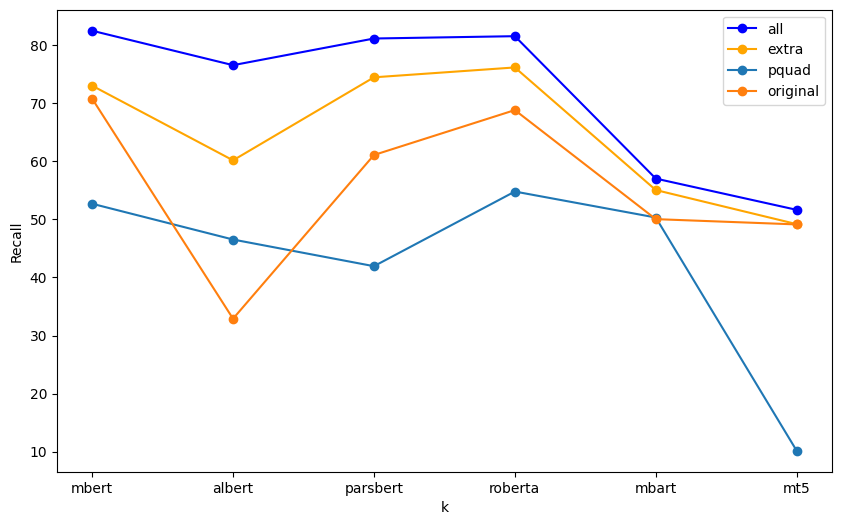

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator


x_axis = ['mbert', 'albert', 'parsbert', 'roberta', 'mbart', 'mt5']


all = [82.46, 76.53, 81.12, 81.52, 57.01, 51.63]
extra = [73.00, 60.15, 74.44, 76.14, 55.04, 49.17]
pquad = [52.68, 46.52, 41.93, 54.78, 50.31, 10.17]
original = [70.77, 32.89, 61.07, 68.80, 50.03, 49.12]


plt.figure(figsize=(10, 6))

plt.plot(x_axis, all, marker='o', label = 'all', color = 'blue')
plt.plot(x_axis, extra, marker='o', label = 'extra', color = 'orange')
plt.plot(x_axis, pquad, marker='o', label = 'pquad')
plt.plot(x_axis, original, marker='o', label = 'original')

plt.xticks(x_axis)
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend()
plt.show()

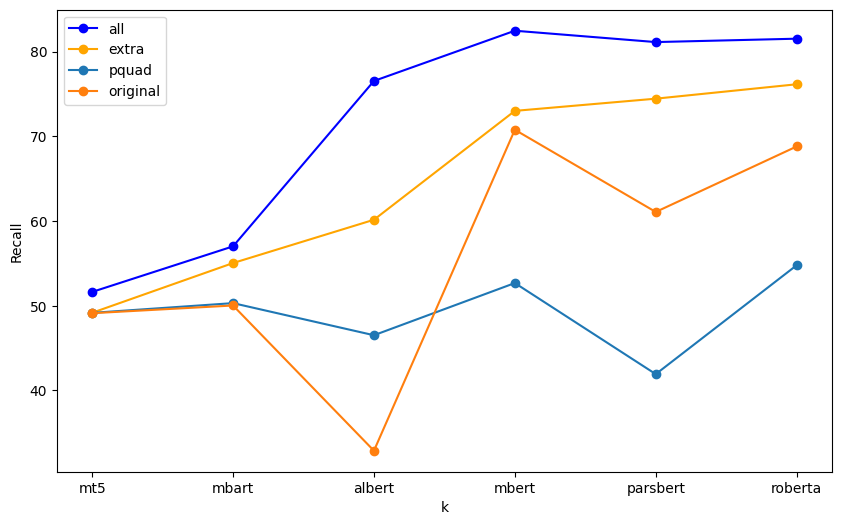

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator


x_axis = ['mt5',  'mbart', 'albert', 'mbert', 'parsbert', 'roberta', ]


all = [51.63, 57.01,76.53, 82.46, 81.12, 81.52, ]
extra = [49.17, 55.04, 60.15, 73.00, 74.44, 76.14, ]
pquad = [ 49.16, 50.31, 46.52, 52.68, 41.93, 54.78,]
original = [49.12, 50.03, 32.89, 70.77, 61.07, 68.80, ]


plt.figure(figsize=(10, 6))

plt.plot(x_axis, all, marker='o', label = 'all', color = 'blue')
plt.plot(x_axis, extra, marker='o', label = 'extra', color = 'orange')
plt.plot(x_axis, pquad, marker='o', label = 'pquad')
plt.plot(x_axis, original, marker='o', label = 'original')

plt.xticks(x_axis)
plt.xlabel('k')
plt.ylabel('Recall')
plt.legend()
plt.show()

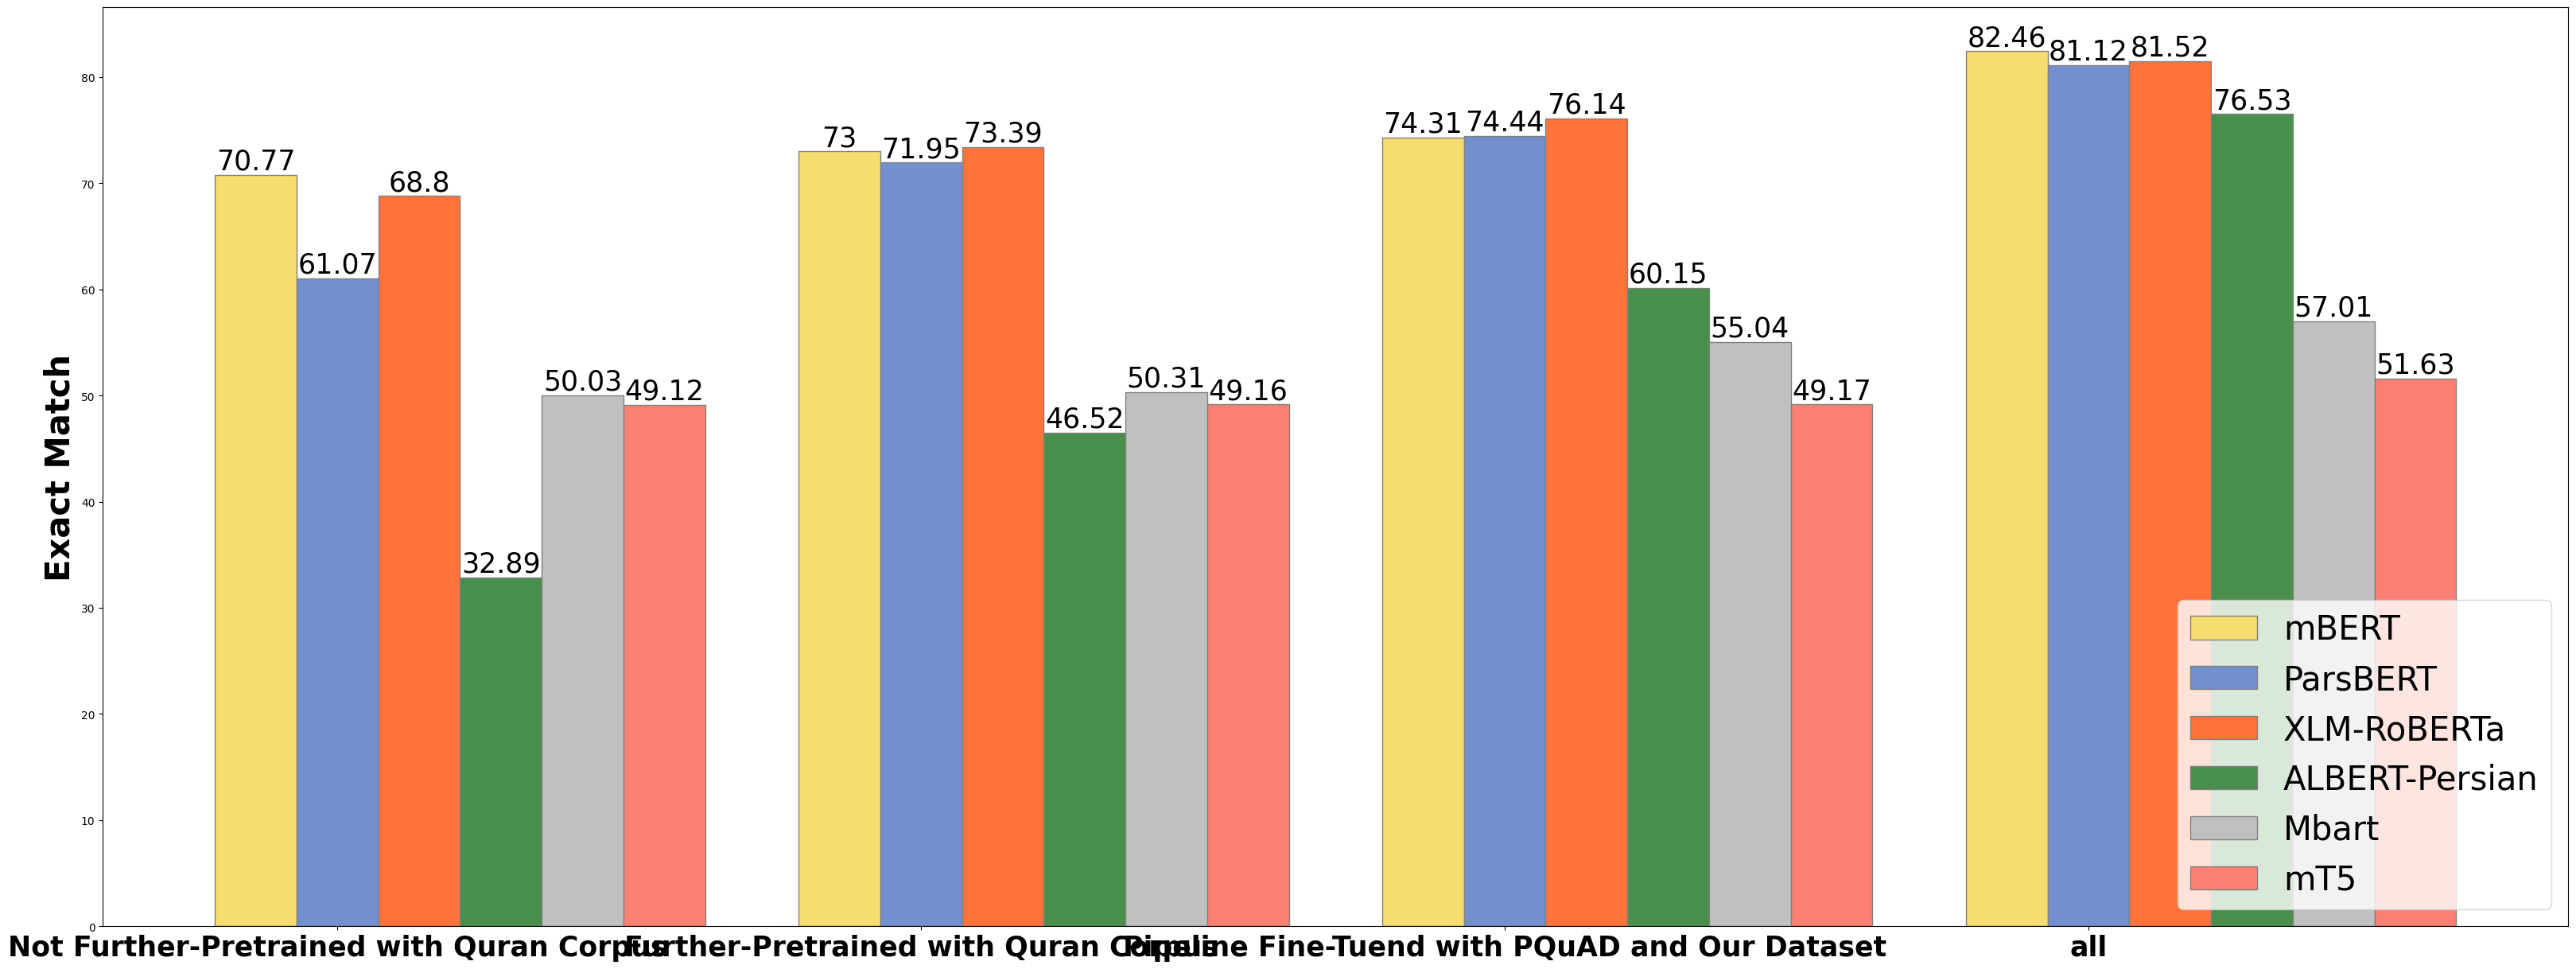

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data = np.array([[59.56, 60.52, 62.2], [59.5, 61.72, 64.59], [61.48, 63.15, 66.02], [56.69, 57.17, 60.76]])

# set width of bar
barWidth = 0.14

x_axis = ['mt5',  'mbart', 'albert', 'mbert', 'parsbert', 'roberta', ]


# all = [51.63, 57.01, 76.53, 82.46, 81.12, 81.52, ].reverse()
# extra = [49.17, 55.04, 60.15, 73.00, 74.44, 76.14, ].reverse()
# pquad = [ 49.16, 50.31, 46.52, 52.68, 41.93, 54.78,].reverse()
# original = [49.12, 50.03, 32.89, 70.77, 61.07, 68.80, ].reverse()


# set height of bar
mBERT = [82.46, 74.31, 73.00, 70.77]
ParsBERT = [81.12, 74.44, 71.95, 61.07]
XLM_RoBERTa = [81.52, 76.14, 73.39, 68.80]
ALBERT_Persian = [76.53, 60.15, 46.52, 32.89]
Mbart = [57.01, 55.04, 50.31, 50.03]
mT5 = [51.63, 49.17, 49.16, 49.12]

labels = ['mBERT', 'ParsBERT', 'XLM_RoBERTa', 'ALBERT_Persian', 'mbart', 'mT5']
groups = ['Not Further-Pretrained with Quran Corpus',
          'Further-Pretrained with Quran Corpus', 'Pipeline Fine-Tuend with PQuAD and Our Dataset', 'all']

# Set position of bar on X axis
br1 = np.arange(len(mBERT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# fig, ax = plt.subplots(layout='constrained', figsize =(30, 5))
fig, ax = plt.subplots(figsize =(40, 15))
# Make the plot
# ax.bar(br1, mBERT, color ='#E3CF57', width = barWidth,
# 		edgecolor ='grey', label ='mBERT')
# ax.bar(br2, ParsBERT, color ='#6495ED', width = barWidth,
# 		edgecolor ='grey', label ='ParsBERT')
# plt.bar(br3, XLM_RoBERTa, color ='#FF4500', width = barWidth,
# 		edgecolor ='grey', label ='XLM-RoBERTa')
# plt.bar(br4, ALBERT_Persian, color ='#698B22', width = barWidth,
# 		edgecolor ='grey', label ='ALBERT-Persian')

ax.bar(br1, mBERT[::-1], color ='#F7DC6F', width = barWidth,
		edgecolor ='grey', label ='mBERT')
ax.bar(br2, ParsBERT[::-1], color ='#728FCE', width = barWidth,
		edgecolor ='grey', label ='ParsBERT')
plt.bar(br3, XLM_RoBERTa[::-1], color ='#FF733B', width = barWidth,
		edgecolor ='grey', label ='XLM-RoBERTa')
plt.bar(br4, ALBERT_Persian[::-1], color ='#498F4C', width = barWidth,
		edgecolor ='grey', label ='ALBERT-Persian')
plt.bar(br5, Mbart[::-1], width = barWidth,
		edgecolor ='grey', label ='Mbart', color = 'silver')
plt.bar(br6, mT5[::-1], width = barWidth,
		edgecolor ='grey', label ='mT5', color = 'salmon')


for c in ax.containers:
    # annotate the container group
    ax.bar_label(c, label_type='edge', fontsize = 25)

plt.xticks([r + barWidth for r in range(len(mBERT))])
ax.set_xticklabels(groups, fontsize = 25, fontweight ='bold')


# ax.set_xticks([r + barWidth for r in range(len(mBERT))],
# 		['Further-Pretrained with Quran Corpus', 'Not Further-Pretrained with Quran Corpus'], fontsize = 15)
# ax.set_xlabel('Groups')
ax.set_ylabel('Exact Match', fontweight ='bold', fontsize = 30)
# ax.legend()
ax.legend(loc='lower right',fontsize="30")
plt.show()

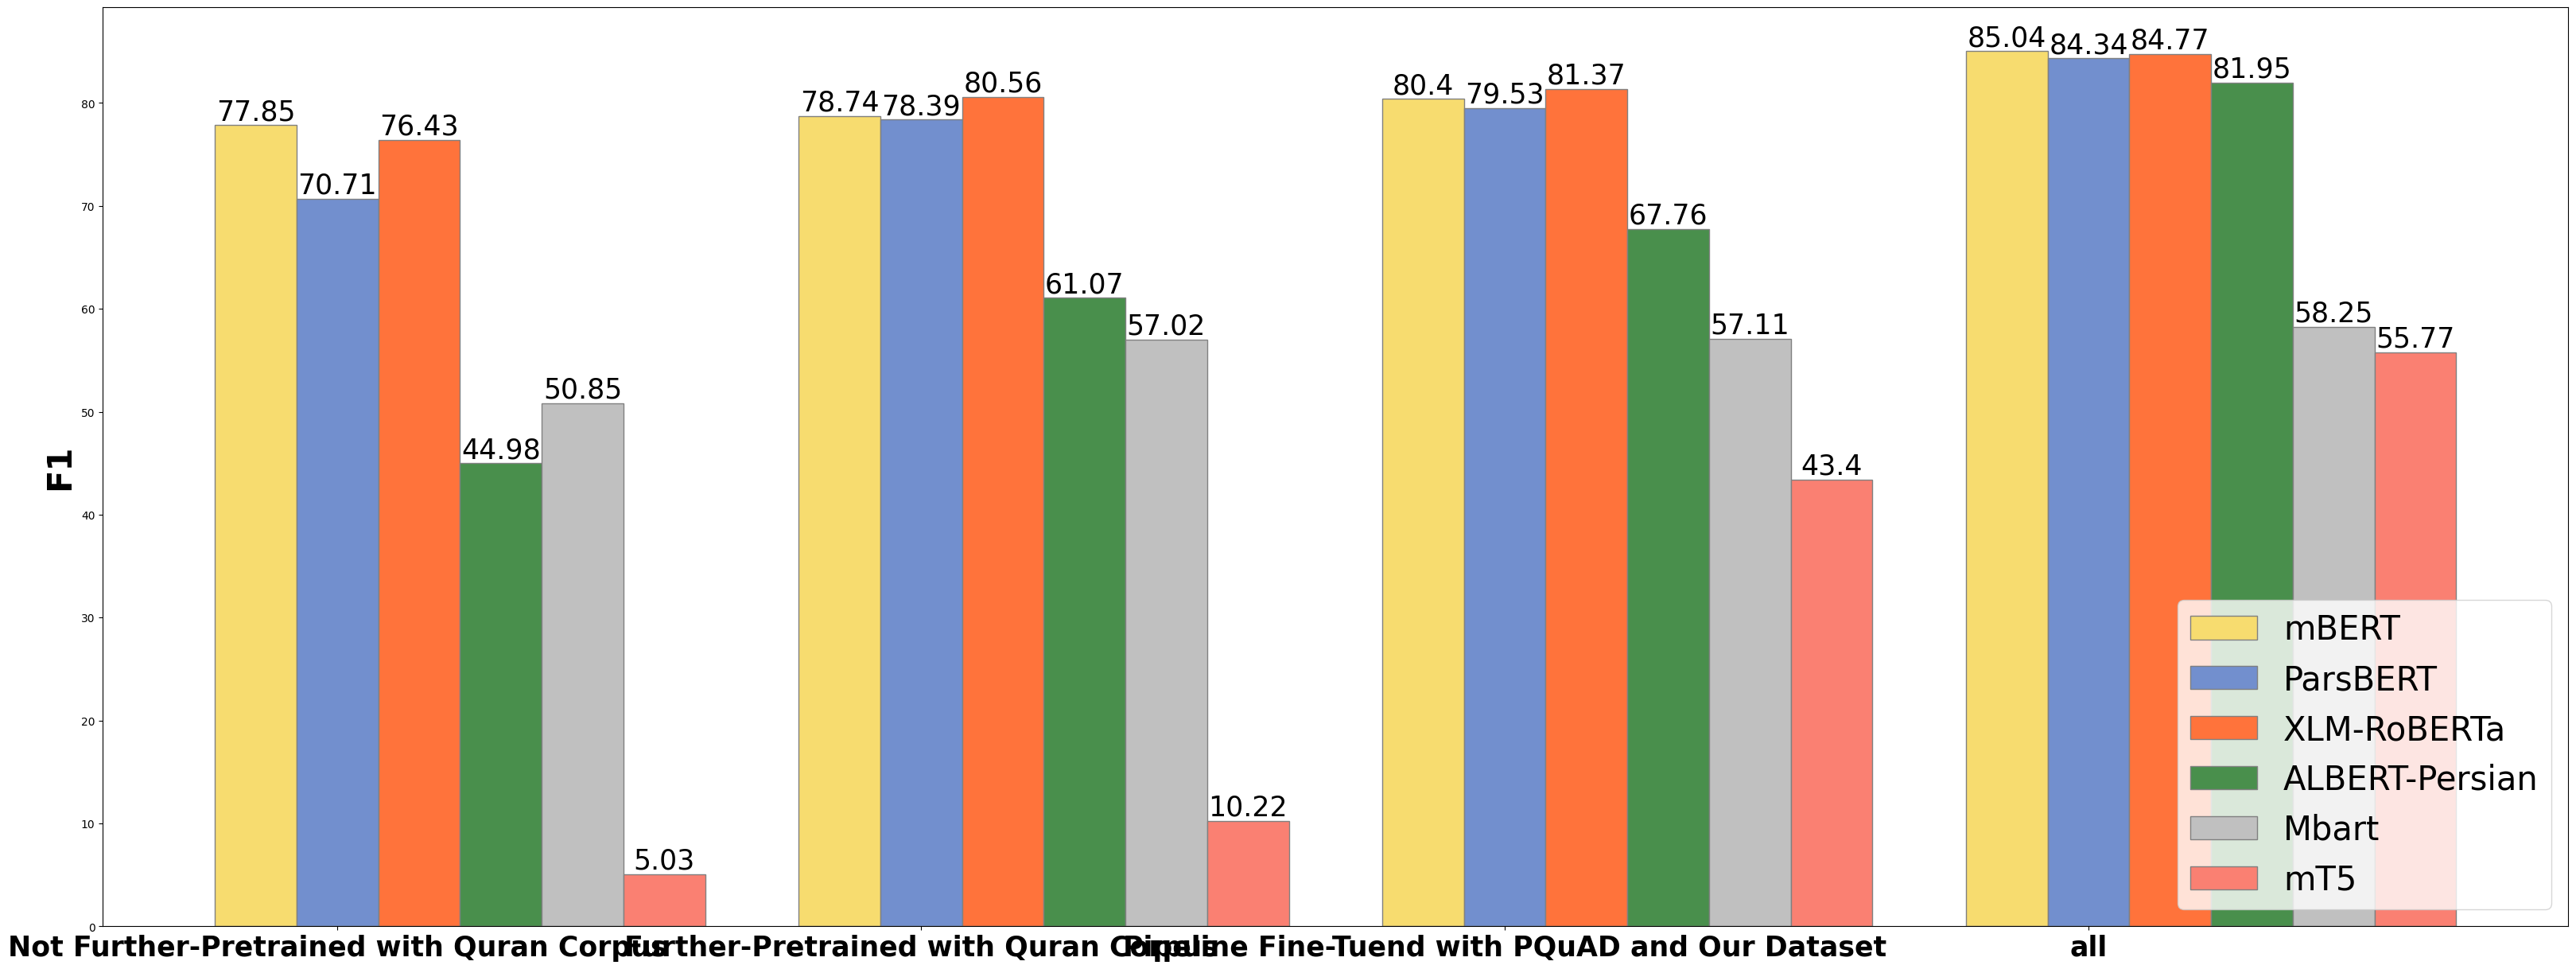

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data = np.array([[59.56, 60.52, 62.2], [59.5, 61.72, 64.59], [61.48, 63.15, 66.02], [56.69, 57.17, 60.76]])

# set width of bar
barWidth = 0.14

x_axis = ['mt5',  'mbart', 'albert', 'mbert', 'parsbert', 'roberta', ]


# all = [51.63, 57.01, 76.53, 82.46, 81.12, 81.52, ].reverse()
# extra = [49.17, 55.04, 60.15, 73.00, 74.44, 76.14, ].reverse()
# pquad = [ 49.16, 50.31, 46.52, 52.68, 41.93, 54.78,].reverse()
# original = [49.12, 50.03, 32.89, 70.77, 61.07, 68.80, ].reverse()


# set height of bar
mBERT = [85.04, 80.40, 78.74, 77.85]
ParsBERT = [84.34, 79.53, 78.39, 70.71]
XLM_RoBERTa = [84.77, 81.37, 80.56, 76.43]
ALBERT_Persian = [81.95, 67.76, 61.07, 44.98]
Mbart = [58.25, 57.11, 57.02, 50.85]
mT5 = [55.77, 43.4, 10.22, 5.03]

labels = ['mBERT', 'ParsBERT', 'XLM_RoBERTa', 'ALBERT_Persian', 'mbart', 'mT5']
groups = ['Not Further-Pretrained with Quran Corpus',
          'Further-Pretrained with Quran Corpus', 'Pipeline Fine-Tuend with PQuAD and Our Dataset', 'all']

# Set position of bar on X axis
br1 = np.arange(len(mBERT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# fig, ax = plt.subplots(layout='constrained', figsize =(30, 5))
fig, ax = plt.subplots(figsize =(40, 15))
# Make the plot
# ax.bar(br1, mBERT, color ='#E3CF57', width = barWidth,
# 		edgecolor ='grey', label ='mBERT')
# ax.bar(br2, ParsBERT, color ='#6495ED', width = barWidth,
# 		edgecolor ='grey', label ='ParsBERT')
# plt.bar(br3, XLM_RoBERTa, color ='#FF4500', width = barWidth,
# 		edgecolor ='grey', label ='XLM-RoBERTa')
# plt.bar(br4, ALBERT_Persian, color ='#698B22', width = barWidth,
# 		edgecolor ='grey', label ='ALBERT-Persian')

ax.bar(br1, mBERT[::-1], color ='#F7DC6F', width = barWidth,
		edgecolor ='grey', label ='mBERT')
ax.bar(br2, ParsBERT[::-1], color ='#728FCE', width = barWidth,
		edgecolor ='grey', label ='ParsBERT')
plt.bar(br3, XLM_RoBERTa[::-1], color ='#FF733B', width = barWidth,
		edgecolor ='grey', label ='XLM-RoBERTa')
plt.bar(br4, ALBERT_Persian[::-1], color ='#498F4C', width = barWidth,
		edgecolor ='grey', label ='ALBERT-Persian')
plt.bar(br5, Mbart[::-1], width = barWidth,
		edgecolor ='grey', label ='Mbart', color = 'silver')
plt.bar(br6, mT5[::-1], width = barWidth,
		edgecolor ='grey', label ='mT5', color = 'salmon')


for c in ax.containers:
    # annotate the container group
    ax.bar_label(c, label_type='edge', fontsize = 25)

plt.xticks([r + barWidth for r in range(len(mBERT))])
ax.set_xticklabels(groups, fontsize = 25, fontweight ='bold')


# ax.set_xticks([r + barWidth for r in range(len(mBERT))],
# 		['Further-Pretrained with Quran Corpus', 'Not Further-Pretrained with Quran Corpus'], fontsize = 15)
# ax.set_xlabel('Groups')
ax.set_ylabel('F1', fontweight ='bold', fontsize = 30)
# ax.legend()
ax.legend(loc='lower right',fontsize="30")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('f1_stagewise.svg')

In [ ]:
# importing package
import matplotlib.pyplot as plt
from statistics import mean

x = np.arange(4)
# y1 = [34, 56, 12, 89, 67]
# y2 = [12, 56, 78, 45, 90]
# y3 = [14, 23, 45, 25, 89]
# y1 = [mean(base_recall), mean(base_map), mean(base_mrr)]
# y2 = [mean(new_recall), mean(new_map), mean(new_mrr)]
# create data
# x = ['xlm_roberta', 'mbert', 'parsbert', 'albert']

y1 = [0.91, 0.09, 0.13, 0.08]
y2 = [0.65, 0.30, 0.2, 0.13]


# plot bars in stack manner
plt.bar(x, y1, color='sandybrown')
plt.bar(x, y2, bottom=y1, color='silver')
plt.xlabel("model")
plt.ylabel("exact match")
plt.legend(["not trained", "trained hahahahahaahhaha"])
plt.show()


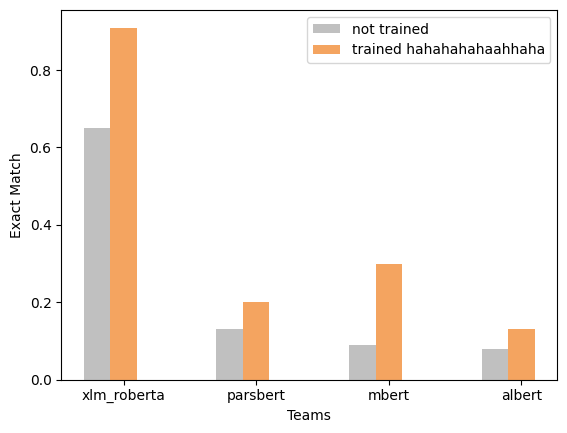

<Figure size 640x480 with 0 Axes>

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = np.arange(4)

# y1 = [0.91, 0.09, 0.13, 0.08]
# y2 = [0.65, 0.30, 0.2, 0.13]

y1 = [0.65, 0.13, 0.09, 0.08]
y2 = [0.91, 0.2, 0.30, 0.13]

width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='silver')
plt.bar(x, y2, width, color='sandybrown')

plt.xticks(x, ['xlm_roberta', 'parsbert', 'mbert', 'albert'])
plt.xlabel("Teams")
plt.ylabel("Exact Match")
plt.legend(["not trained", "trained hahahahahaahhaha"])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test4.svg')


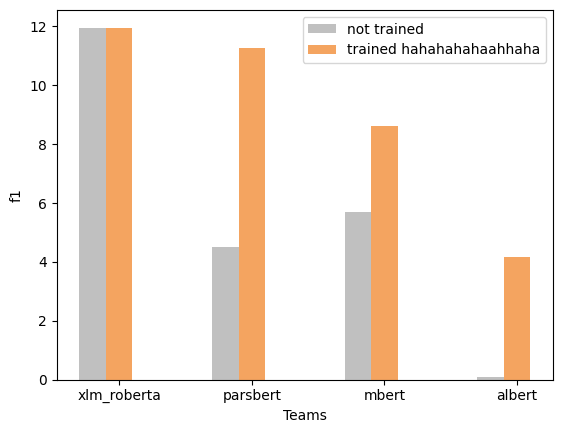

<Figure size 640x480 with 0 Axes>

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = np.arange(4)

# y1 = [11.96, 5.68, 4.51, 0.09]
# y2 = [11.96, 8.60, 11.28, 4.16]

y1 = [11.96, 4.51,5.68, 0.09]
y2 = [11.96, 11.28, 8.60, 4.16]

# width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='silver')
plt.bar(x, y2, width, color='sandybrown')
plt.xticks(x, ['xlm_roberta', 'parsbert','mbert', 'albert'])
plt.xlabel("Teams")
plt.ylabel("f1")
plt.legend(["not trained", "trained hahahahahaahhaha"])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test3.svg')
# plt.savefig("test2.svg")

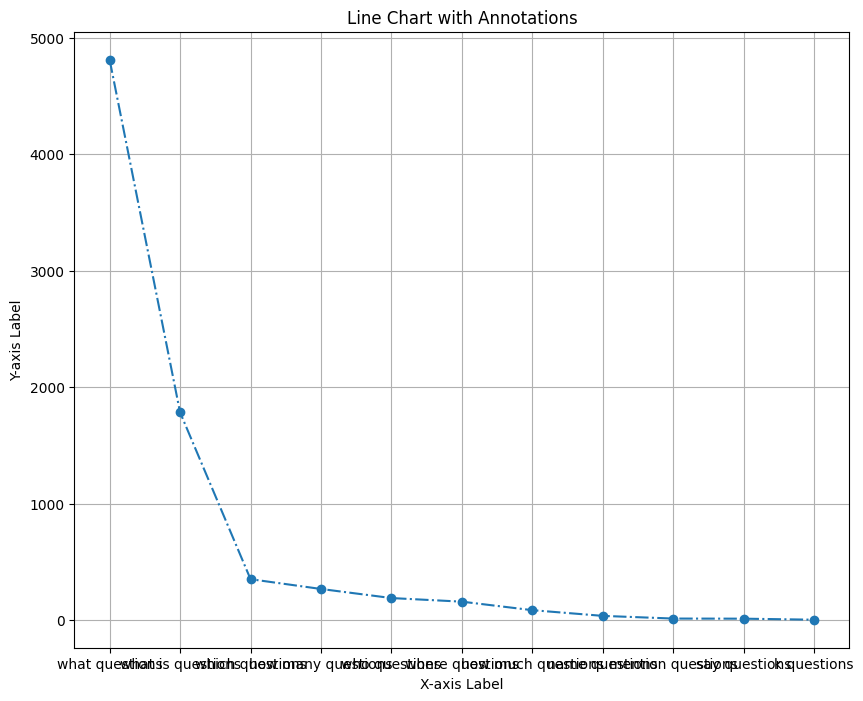

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Sample data

Employee = ['what questions','what is questions','which questions', 'how many questions',
         'who questions', 'where questions','how much questions', 'name questions',
          'mention questions', 'say questions', 'k questions']

# Setting size in Chart based on
# given values
# Salary = [40000, 50000, 70000, 54000, 44000]
Salary = [4811, 351, 1783, 267, 85, 189, 13, 158, 12, 36, 3]
Salary.sort(reverse=True)
x = Employee
y = Salary

# Create a line chart
plt.figure(figsize=(10, 8))
plt.plot(x, y, marker='o', linestyle='-.')

# Add annotations
# for i, (xi, yi) in enumerate(zip(x, y)):
# 	plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

# Add title and labels
plt.title('Line Chart with Annotations')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Display grid
plt.grid(True)

# Show the plot
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('t3.svg')

In [ ]:
print(Salary.sort())

None


In [ ]:
Salary

[3, 12, 13, 36, 85, 158, 189, 267, 351, 1783, 4811]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x_axis = ['mBERT', 'ParsBERT', 'XLM-RoBERTa', 'ALBERT-Persian', 'mBART', 'mT5']

# ansarian = np.array(['67.68', '68.90', '68.9', '67.07'])
# makarem = np.array(['71.42', '74.74', '74.74', '72.44'])
# fooladvand = np.array(['75.67', '74.32', '78.37', '72.97'])
# ghomshei = np.array(['57.14', '54.28', '60.00', '56.42'])
# moezzi = np.array(['65.00', '62.5', '71.66', '60.83'])
# sadeqi = np.array(['60.71', '66.42', '67.85', '65.0'])
# mojtabavi = np.array(['58.57', '62.85', '61.42', '62.85'])
# bahrampour = np.array(['72.15', '74.68', '81.01', '74.68'])
# ayati = np.array(['67.08', '60.75', '64.55', '72.15'])
# khorramshahi = np.array(['68.24', '72.29', '70.94', '69.59'])
# khorramdel = np.array(['61.7', '66.66', '65.24', '63.12'])

ansarian = [67.68, 68.90, 68.9, 67.07, 72.02, 78.05]
makarem = [71.42, 74.74, 74.74, 72.44, 74.04, 79.39]
fooladvand = [75.67, 74.32, 78.37, 72.97, 74.87, 80.90]
ghomshei = [57.14, 54.28, 60.00, 56.42, 65.66, 77.72]
moezzi = [65.00, 62.5, 71.66, 60.83, 68.50, 78.55]
sadeqi = [60.71, 66.42, 67.85, 65.0, 67.50, 75.37]
mojtabavi = [58.57, 62.85, 61.42, 62.85, 71.85, 79.73]
bahrampour = [72.15, 74.68, 81.01, 74.68, 72.69, 81.40]
ayati = [67.08, 60.75, 64.55, 72.15, 73.70, 82.24]
khorramshahi = [68.24, 72.29, 70.94, 69.59, 69.51, 75.37]
khorramdel = [61.7, 66.66, 65.24, 63.12, 69.51, 76.38]

plt.figure(figsize=(15, 10))

plt.plot(x_axis, ansarian, marker='o', label = 'ansarian')
plt.plot(x_axis, makarem, marker='v', label = 'makarem')
plt.plot(x_axis, fooladvand, marker='p', label = 'fooladvand')
plt.plot(x_axis, ghomshei, marker='s', label = 'ghomshei')
plt.plot(x_axis, moezzi, marker='x', label = 'moezzi')
plt.plot(x_axis, sadeqi, marker='D', label = 'sadeqi')
plt.plot(x_axis, mojtabavi, marker='>', label = 'mojtabavi')
plt.plot(x_axis, bahrampour, marker='<', label = 'bahrampour')
plt.plot(x_axis, ayati, marker='P', label = 'ayati')
plt.plot(x_axis, khorramshahi, marker='X', label = 'khorramshahi')
plt.plot(x_axis, khorramdel, marker='d', label = 'khorramdel', color = 'springgreen')



plt.title('title name')
plt.xlabel('Model Name')
plt.ylabel('Exact Match')
plt.legend()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('all_em_readers.svg')

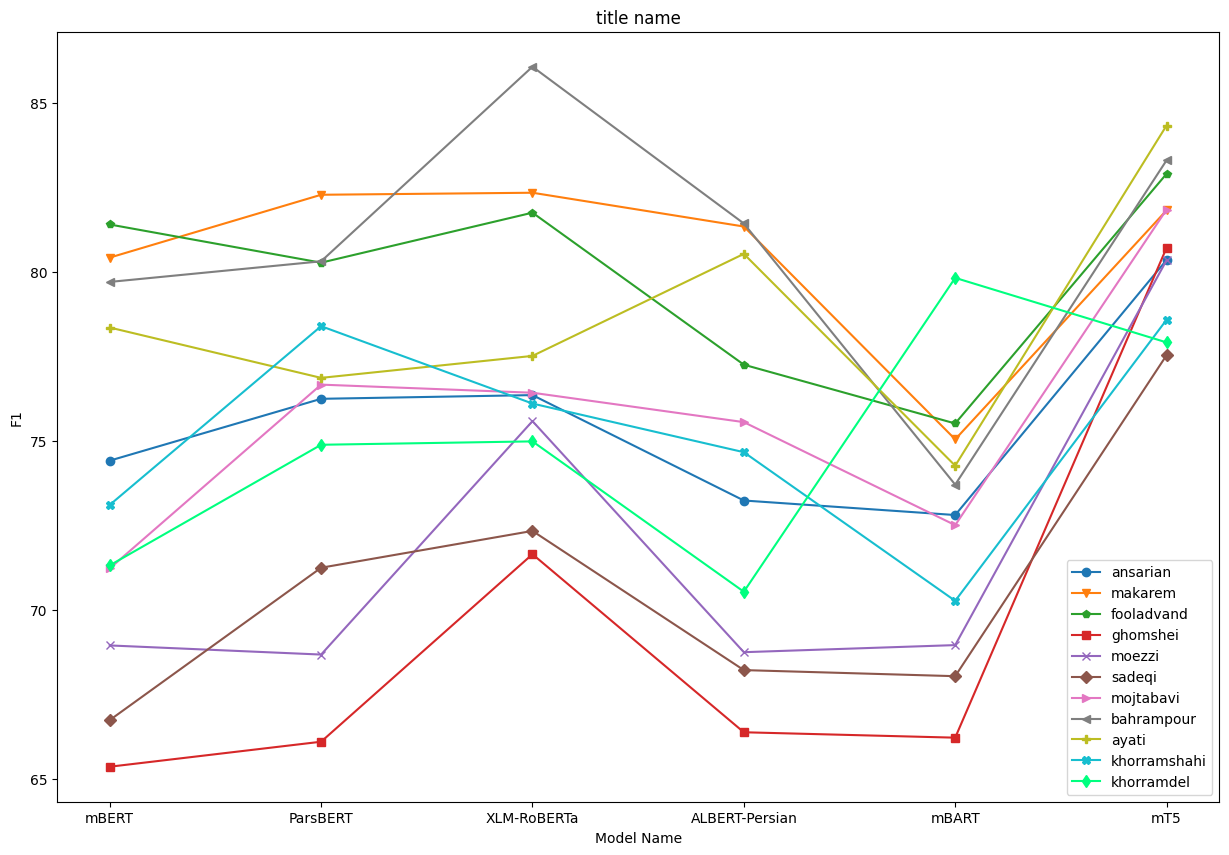

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x_axis = ['mBERT', 'ParsBERT', 'XLM-RoBERTa', 'ALBERT-Persian', 'mBART', 'mT5']

ansarian = [74.41, 76.24, 76.35, 73.23, 72.80, 80.35]
makarem = [80.42, 82.28, 82.34, 81.34, 75.04, 81.82]
fooladvand = [81.4, 80.27, 81.75, 77.25, 75.51, 82.90]
ghomshei = [65.35, 66.09, 71.64, 66.37, 66.21, 80.71]
moezzi = [68.94, 68.67, 75.58, 68.74, 68.95, 80.34]
sadeqi = [66.73, 71.24, 72.33, 68.21, 68.03, 77.53]
mojtabavi = [71.22, 76.66, 76.42, 75.55, 72.50, 81.84]
bahrampour = [79.7, 80.31, 86.07, 81.43, 73.70, 83.30]
ayati = [78.35, 76.86, 77.51, 80.53, 74.26, 84.33]
khorramshahi = [73.1, 78.39, 76.1, 74.66, 70.26, 78.58]
khorramdel = [71.31, 74.88, 74.98, 70.53, 79.82, 77.91]

plt.figure(figsize=(15, 10))

plt.plot(x_axis, ansarian, marker='o', label = 'ansarian')
plt.plot(x_axis, makarem, marker='v', label = 'makarem')
plt.plot(x_axis, fooladvand, marker='p', label = 'fooladvand')
plt.plot(x_axis, ghomshei, marker='s', label = 'ghomshei')
plt.plot(x_axis, moezzi, marker='x', label = 'moezzi')
plt.plot(x_axis, sadeqi, marker='D', label = 'sadeqi')
plt.plot(x_axis, mojtabavi, marker='>', label = 'mojtabavi')
plt.plot(x_axis, bahrampour, marker='<', label = 'bahrampour')
plt.plot(x_axis, ayati, marker='P', label = 'ayati')
plt.plot(x_axis, khorramshahi, marker='X', label = 'khorramshahi')
plt.plot(x_axis, khorramdel, marker='d', label = 'khorramdel', color = 'springgreen')


plt.title('title name')
plt.xlabel('Model Name')
plt.ylabel('F1')
plt.legend()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('all_f1_readers.svg')